In [1]:
############################################
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
#
import numpy as np
#
# https://docs.pymc.io/
import pymc3 as pm
import theano
import time
from pymc3.backends.base import merge_traces
#
print('numpy      Ver.', np.__version__)
print('matplotlib Ver.', mpl.__version__)
print('pymc3      Ver.', pm.__version__)
print('theano     Ver.', theano.__version__)
#
#
file_path = "demo04-Gauss05/"
#
if( True != os.path.isdir(file_path) ):
    print('making ', file_path )
    os.mkdir(file_path)
else:
    print(file_path, ' is exist.' )

numpy      Ver. 1.19.2
matplotlib Ver. 3.3.2
pymc3      Ver. 3.8
theano     Ver. 1.0.4
demo04-Gauss05/  is exist.


In [2]:
############################################
def Gauss3(X, a1, mu1, b1, \
              a2, mu2, b2, \
              a3, mu3, b3 ):
    y = a1*np.exp(-b1*(X-mu1)*(X-mu1)/2) + \
        a2*np.exp(-b2*(X-mu2)*(X-mu2)/2) + \
        a3*np.exp(-b3*(X-mu3)*(X-mu3)/2) 
    return y

In [3]:
######################################
def grf_Gauss(X, 
              Y_true, Y,
              title):
    #
    plt.rcParams['font.size'] = 16
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust( \
            left=0.15, right=0.98, 
            top=0.93,  bottom=0.1 )
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('g(x)')
    #
    ax1.plot(X, Y_true, color='red', \
             linewidth=2.0, \
             label=r'$Y_{true}$' )
    #
    ax1.scatter(X, Y, color='blue',  \
                s=10.0, 
                label=r'$Y$' )
    #
    plt.title( title )
    plt.legend()
    #
    return fig

In [4]:
############################################
N = 301
#
X = np.linspace(0, 3.0, num=N, \
                endpoint=True )
#
a1_true  = 0.587
mu1_true = 1.210
b1_true  = 95.689
#
a2_true  = 1.522
mu2_true = 1.455
b2_true  = 146.837
#
a3_true  = 1.183
mu3_true = 1.703
b3_true  = 164.469
#
############################################
Y_true=Gauss3(X,a1_true,mu1_true,b1_true, \
                a2_true,mu2_true,b2_true, \
                a3_true,mu3_true,b3_true ) 
#
sigma_noise = 0.1
#
np.random.seed(seed=1)
#
Y_noise = np.random.normal( loc=0, 
                       scale=sigma_noise,
                       size=N )
Y_noise_mean = np.mean(Y_noise)
Y_noise_std  = np.std(Y_noise)
#
Y = Y_true + Y_noise
#
print(Y_noise_std)

0.09492162492854149


demo04-Gauss05/Gauss05-data-org.pdf


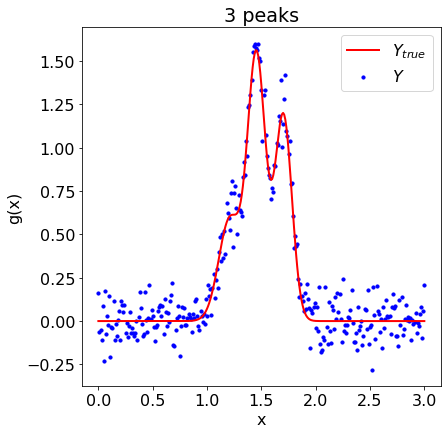

In [5]:
############################################
fig = grf_Gauss(X, Y_true, Y, \
          '3 peaks')
#
fname = "Gauss05-data-org.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

In [6]:
############################################
prior_mu_sd = 1.0 / np.sqrt(5.0)
print(prior_mu_sd)
############################################
def MCMC(Ydata):
    # for demo 
    np.random.seed(seed=1)
    #
    with pm.Model() as  model:
        #
        mu1 = pm.Normal('mu1', \
                mu=1.5, sd=prior_mu_sd)
        a1  = pm.Gamma('a1', \
                     alpha=5.0, beta=5.0)
        b1  = pm.Gamma('b1', \
                     alpha=5.0, beta=0.04)
        #
        mu2 = pm.Normal('mu2', \
                mu=1.5, sd=prior_mu_sd)
        a2  = pm.Gamma('a2', \
                     alpha=5.0, beta=5.0)
        b2  = pm.Gamma('b2', \
                     alpha=5.0, beta=0.04)
        #
        mu3 = pm.Normal('mu3', \
                mu=1.5, sd=prior_mu_sd)
        a3  = pm.Gamma('a3', \
                     alpha=5.0, beta=5.0)
        b3  = pm.Gamma('b3', \
                     alpha=5.0, beta=0.04)
        #
        rmsd = pm.Uniform('rmsd', \
                      lower=0, upper=1 )
        #
        y    = pm.Normal('y',
                mu=Gauss3(X, \
                          a1, mu1, b1, \
                          a2, mu2, b2, \
                          a3, mu3, b3 ), \
                sd=rmsd, \
                observed=Ydata)
        #
        # return pm.sample(10000, \
        #               tune=10000, \
        #               chains=2 )
        #
        return pm.sample(10000, \
                      tune=10000, \
                      chains=2 )    

0.4472135954999579


In [7]:
############################################
trace = MCMC( Y )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rmsd, b3, a3, mu3, b2, a2, mu2, b1, a1, mu1]
Sampling 2 chains, 0 divergences: 100%|██████████| 40000/40000 [01:56<00:00, 342.47draws/s]
The acceptance probability does not match the target. It is 0.7197674555606325, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has 

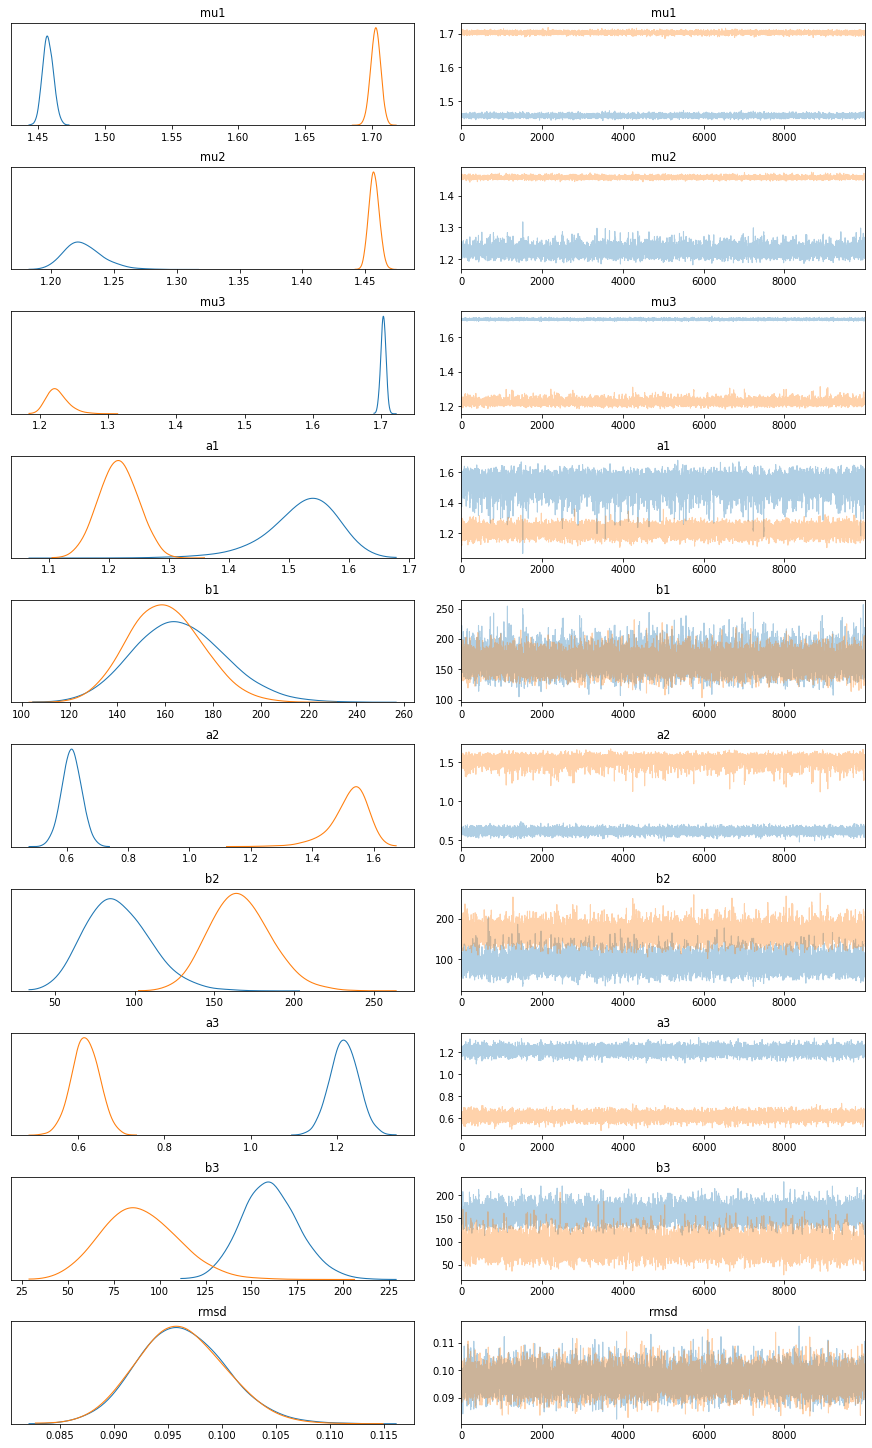

In [8]:
############################################
pm.traceplot(trace)
#
plt.savefig( file_path + \
    "Gauss05-trace01.pdf" )

In [9]:
############################################
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu1,1.580,0.123,1.451,1.709,0.087,0.074,2.0,2.0,3.0,39.0,1.83
mu2,1.342,0.116,1.208,1.466,0.082,0.069,2.0,2.0,3.0,38.0,1.83
mu3,1.465,0.239,1.208,1.710,0.169,0.143,2.0,2.0,3.0,41.0,1.83
a1,1.368,0.159,1.164,1.595,0.109,0.091,2.0,2.0,3.0,42.0,1.82
b1,163.313,17.514,130.744,195.836,1.806,1.379,94.0,81.0,115.0,258.0,1.02
a2,1.068,0.454,0.564,1.593,0.319,0.270,2.0,2.0,3.0,41.0,1.83
b2,128.090,43.112,58.861,194.597,27.792,22.697,2.0,2.0,3.0,42.0,1.80
a3,0.917,0.301,0.567,1.265,0.212,0.179,2.0,2.0,3.0,40.0,1.83
b3,125.052,39.688,60.479,185.930,25.589,20.911,2.0,2.0,3.0,40.0,1.80
rmsd,0.096,0.004,0.089,0.104,0.000,0.000,17612.0,17600.0,17575.0,12487.0,1.00


In [10]:
############################################
prior_mu_sd = 1.0 / np.sqrt(5.0)
print(prior_mu_sd)
############################################
def MCMC2(Ydata):
    # for demo 
    np.random.seed(seed=1)
    #
    with pm.Model() as  model:
        #
        mu1 = pm.Normal('mu1', \
                mu=1.5, sd=prior_mu_sd)
        a1  = pm.Gamma('a1', \
                     alpha=5.0, beta=5.0)
        b1  = pm.Gamma('b1', \
                     alpha=5.0, beta=0.04)
        #
        mu2 = pm.Normal('mu2', \
                mu=1.5, sd=prior_mu_sd)
        a2  = pm.Gamma('a2', \
                     alpha=5.0, beta=5.0)
        b2  = pm.Gamma('b2', \
                     alpha=5.0, beta=0.04)
        #
        mu3 = pm.Normal('mu3', \
                mu=1.5, sd=prior_mu_sd)
        a3  = pm.Gamma('a3', \
                     alpha=5.0, beta=5.0)
        b3  = pm.Gamma('b3', \
                     alpha=5.0, beta=0.04)
        #
        rmsd = pm.Uniform('rmsd', \
                      lower=0, upper=1 )
        #
        y    = pm.Normal('y',
                mu=Gauss3(X, \
                          a1, mu1, b1, \
                          a2, mu2, b2, \
                          a3, mu3, b3 ), \
                sd=rmsd, \
                observed=Ydata)
        #
        start = pm.find_MAP(method='powell')
        #
        print( start )
        #
        return pm.sample(10000, \
                         # tune=10000, \
                         start = start,
                         chains=2 )    

0.4472135954999579


In [11]:
############################################
trace2 = MCMC2( Y )

  0%|          | 0/5000 [00:00<?, ?it/s]C:\wsci\anaconda3\envs\pymc3\lib\site-packages\scipy\optimize\_minimize.py:517: RuntimeWarning: Method powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
logp = 264.79, ||grad|| = 105.86: 100%|██████████| 3339/3339 [00:02<00:00, 1269.71it/s]   
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


{'mu1': array(1.45673273), 'a1_log__': array(0.43407067), 'b1_log__': array(5.0793102), 'mu2': array(1.2209013), 'a2_log__': array(-0.48464222), 'b2_log__': array(4.53397638), 'mu3': array(1.70358345), 'a3_log__': array(0.19758327), 'b3_log__': array(5.09024344), 'rmsd_interval__': array(-2.25888196), 'a1': array(1.54352794), 'b1': array(160.66319264), 'a2': array(0.61591752), 'b2': array(93.12813903), 'a3': array(1.21845452), 'b3': array(162.42939914), 'rmsd': array(0.09458607)}


Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rmsd, b3, a3, mu3, b2, a2, mu2, b1, a1, mu1]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [01:05<00:00, 322.68draws/s]


In [12]:
############################################
pm.summary( trace2 )

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu1,1.457,0.004,1.450,1.465,0.000,0.000,8825.0,8817.0,8948.0,10264.0,1.0
mu2,1.226,0.016,1.199,1.257,0.000,0.000,5613.0,5578.0,6239.0,6307.0,1.0
mu3,1.703,0.004,1.696,1.710,0.000,0.000,11830.0,11830.0,11922.0,12996.0,1.0
a1,1.519,0.062,1.402,1.624,0.001,0.001,6150.0,6150.0,7823.0,6221.0,1.0
b1,166.618,19.458,131.666,203.909,0.234,0.167,6922.0,6806.0,7055.0,9300.0,1.0
a2,0.617,0.032,0.557,0.676,0.000,0.000,14634.0,14599.0,14724.0,12851.0,1.0
b2,89.581,20.625,52.314,128.380,0.241,0.171,7301.0,7301.0,6843.0,6821.0,1.0
a3,1.216,0.032,1.157,1.278,0.000,0.000,17946.0,17946.0,17930.0,14782.0,1.0
b3,160.231,15.230,132.188,188.718,0.137,0.097,12275.0,12275.0,12208.0,12201.0,1.0
rmsd,0.096,0.004,0.089,0.104,0.000,0.000,18343.0,18275.0,18344.0,13099.0,1.0


C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has 

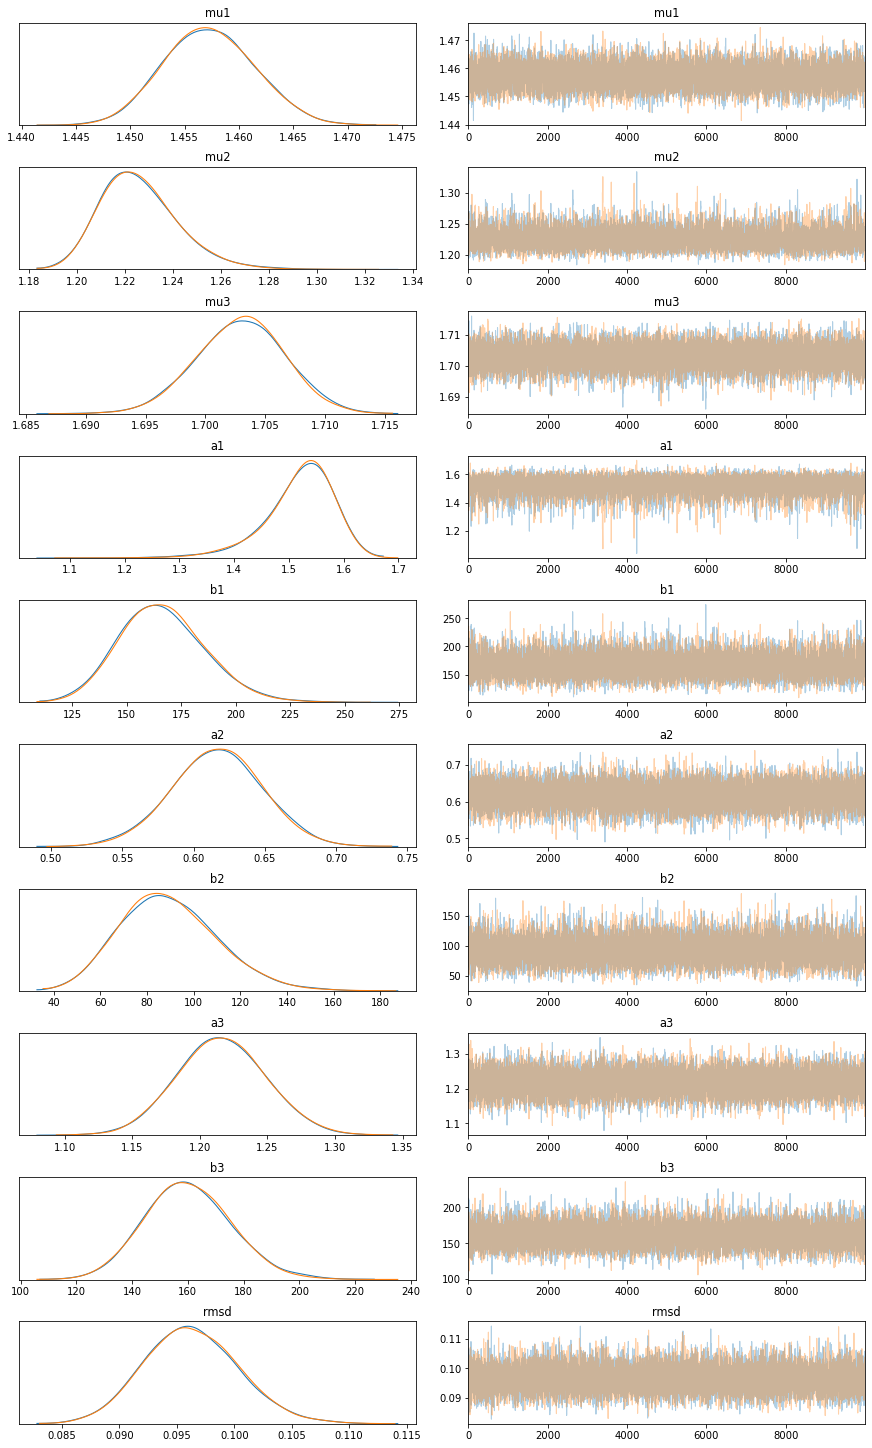

In [13]:
############################################
pm.traceplot( trace2 )
#
plt.savefig( file_path + \
    "Gauss05-trace02.pdf" )

In [14]:
############################################
def grf_PthetaD( trace, name, true_val, \
                 xlabel, ylabel ):
    plt.rcParams['font.size'] = 16
    #
    trace_theta= trace[ name ]
    #
    summary = pm.summary(trace,[name])
    #
    print('true-%s = %.5f' % \
          (name, true_val))
    #
    mean = np.float(summary['mean'])
    print('Mean-%s = %.5f' % \
          (name, mean))
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust( \
                left=0.2, right=0.98, 
                top=0.99,  bottom=0.2 )
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel( xlabel )
    ax1.set_ylabel( ylabel )
    plt.xticks(rotation=90)
    #
    bin_vals, bins, patches = ax1.hist( \
                    trace_theta, \
                    bins=100, \
                    density=True, \
                    color='gray', \
                    label='Posterior')
    #
    # MODE
    theta_MODE = bins[np.argmax(bin_vals)]
    print('MODE-%s  = %.5f' % \
          (name, theta_MODE))
    #
    (y_bot, y_top) = ax1.set_ylim()
    #
    ax1.vlines(mean, y_bot, y_top, \
               color='red', \
               label='Mean-'+name, \
               linestyles='dashed', \
               linewidth=1.0)
    #
    ax1.vlines(theta_MODE, y_bot, y_top, \
               color='blue', \
               label='MODE-'+name, \
               linestyles='dashed', \
               linewidth=1.0)
    #
    ax1.vlines(true_val, y_bot, y_top, \
               color='black', \
               label='True-'+name, \
               linestyles='dashed', \
               linewidth=1.0)
    #
    ax1.legend()
    #
    return fig, mean, theta_MODE

true-a1 = 1.52200
Mean-a1 = 1.51900
MODE-a1  = 1.54059
demo04-Gauss05/Gauss05-Posterior-a1.pdf


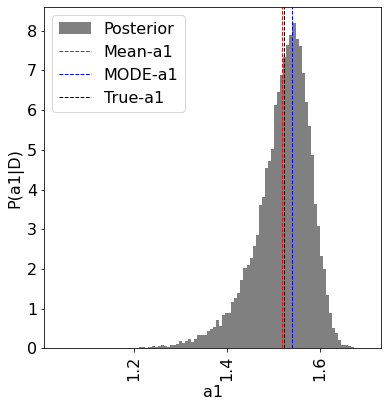

In [15]:
############################################
fig, a1_mean, a1_MODE = grf_PthetaD( \
                    trace2, 'a1', a2_true, \
                    'a1', 'P(a1|D)' )
#
fname = "Gauss05-Posterior-a1.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-a2 = 0.58700
Mean-a2 = 0.61700
MODE-a2  = 0.61923
demo04-Gauss05/Gauss05-Posterior-a2.pdf


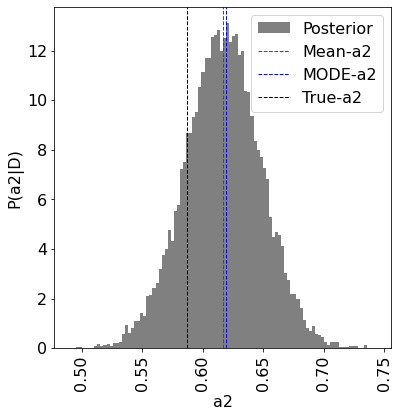

In [16]:
############################################
fig, a2_mean, a2_MODE = grf_PthetaD( \
                    trace2, 'a2', a1_true, \
                    'a2', 'P(a2|D)' )
#
fname = "Gauss05-Posterior-a2.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-a3 = 1.18300
Mean-a3 = 1.21600
MODE-a3  = 1.21291
demo04-Gauss05/Gauss05-Posterior-a3.pdf


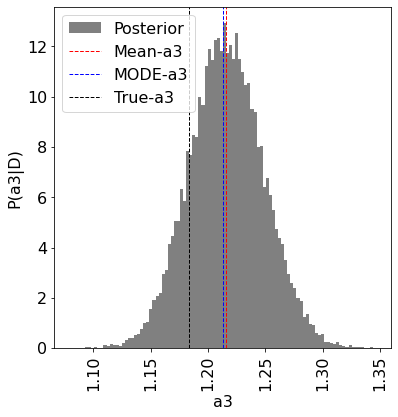

In [17]:
############################################
fig, a3_mean, a3_MODE = grf_PthetaD( \
                    trace2, 'a3', a3_true, \
                    'a3', 'P(a3|D)' )
#
fname = "Gauss05-Posterior-a3.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-mu1 = 1.45500
Mean-mu1 = 1.45700
MODE-mu1  = 1.45668
demo04-Gauss05/Gauss05-Posterior-mu1.pdf


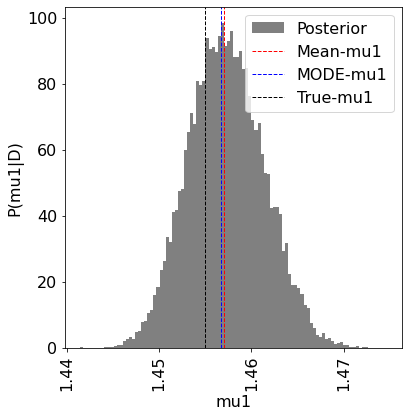

In [18]:
############################################
fig, mu1_mean, mu1_MODE = grf_PthetaD( \
                    trace2, 'mu1', mu2_true, \
                    'mu1', 'P(mu1|D)' )
#
fname = "Gauss05-Posterior-mu1.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-mu2 = 1.21000
Mean-mu2 = 1.22600
MODE-mu2  = 1.21798
demo04-Gauss05/Gauss05-Posterior-mu2.pdf


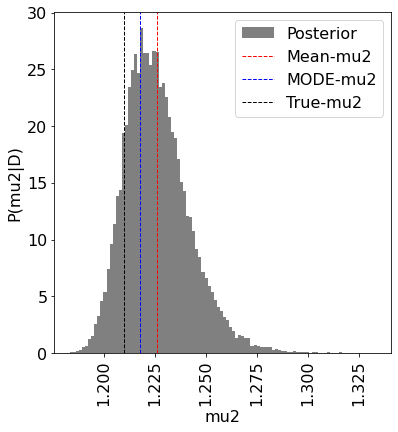

In [19]:
############################################
fig, mu2_mean, mu2_MODE = grf_PthetaD( \
                    trace2, 'mu2', mu1_true, \
                    'mu2', 'P(mu2|D)' )
#
fname = "Gauss05-Posterior-mu2.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-mu3 = 1.70300
Mean-mu3 = 1.70300
MODE-mu3  = 1.70341
demo04-Gauss05/Gauss05-Posterior-mu3.pdf


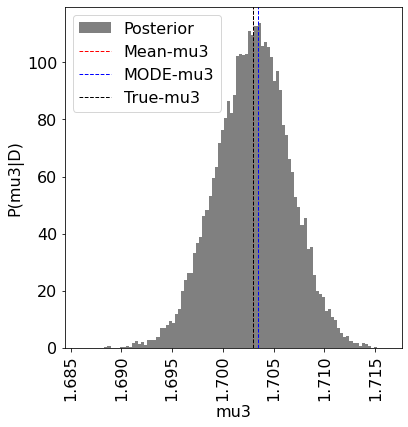

In [20]:
############################################
fig, mu3_mean, mu3_MODE = grf_PthetaD( \
                    trace2, 'mu3', mu3_true, \
                    'mu3', 'P(mu3|D)' )
#
fname = "Gauss05-Posterior-mu3.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-b1 = 146.83700
Mean-b1 = 166.61800
MODE-b1  = 165.07652
demo04-Gauss05/Gauss05-Posterior-b1.pdf


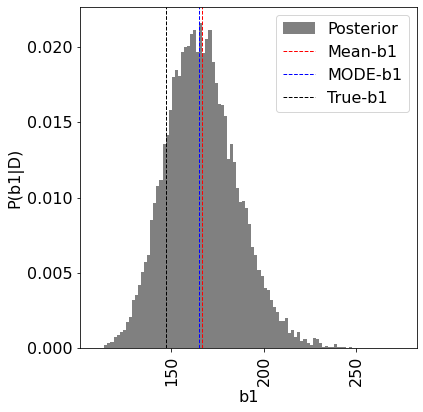

In [21]:
############################################
fig, b1_mean, b1_MODE = grf_PthetaD( \
                    trace2, 'b1', b2_true, \
                    'b1', 'P(b1|D)' )
#
fname = "Gauss05-Posterior-b1.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-b2 = 95.68900
Mean-b2 = 89.58100
MODE-b2  = 83.83043
demo04-Gauss05/Gauss05-Posterior-b2.pdf


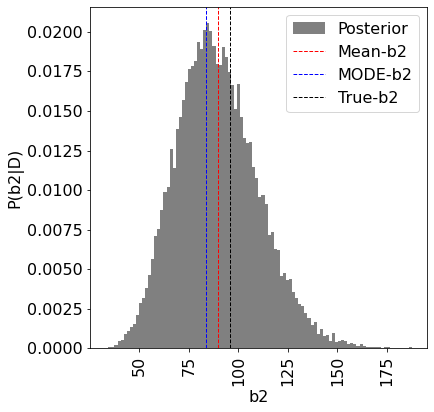

In [22]:
############################################
fig, b2_mean, b2_MODE = grf_PthetaD( \
                    trace2, 'b2', b1_true, \
                    'b2', 'P(b2|D)' )
#
fname = "Gauss05-Posterior-b2.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-b3 = 164.46900
Mean-b3 = 160.23100
MODE-b3  = 158.92899
demo04-Gauss05/Gauss05-Posterior-b3.pdf


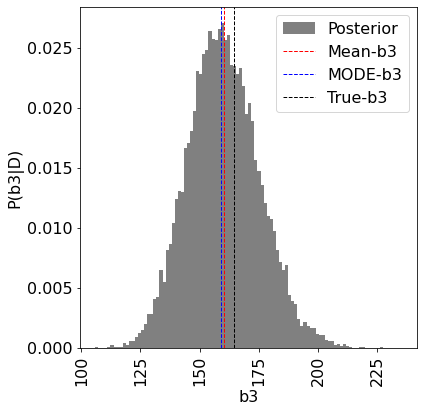

In [23]:
############################################
fig, b3_mean, b3_MODE = grf_PthetaD( \
                    trace2, 'b3', b3_true, \
                    'b3', 'P(b3|D)' )
#
fname = "Gauss05-Posterior-b3.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

In [24]:
######################################
def grf_GaussRep(X, 
              Y_true, Y, 
              Y_mean, Y_MODE,
              title):
    #
    plt.rcParams['font.size'] = 16
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust( \
            left=0.15, right=0.98, 
            top=0.93,  bottom=0.1 )
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('g(x)')
    #
    ax1.plot(X, Y_true, color='red', \
             linewidth=2.0, \
             label=r'$Y_{true}$' )
    #
    ax1.scatter(X, Y, color='blue',  \
                s=10.0, 
                label=r'$Y$' )
    #
    ax1.plot(X, Y_mean, color='blue', \
             linewidth=2.0, \
             label=r'$Y_{mean}$' )
    #
    ax1.plot(X, Y_MODE, color='green', \
             linewidth=2.0, \
             label=r'$Y_{MODE}$' )
    #
    plt.title( title )
    plt.legend()
    #
    return fig

demo04-Gauss05/Gauss05-data-reprod.pdf


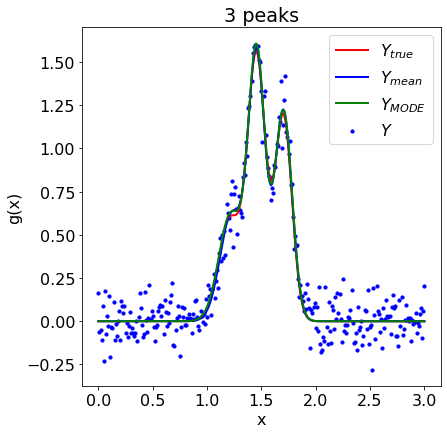

In [25]:
############################################
Y_mean = Gauss3(X, \
                a1_mean,mu1_mean,b1_mean, \
                a2_mean,mu2_mean,b2_mean, \
                a3_mean,mu3_mean,b3_mean ) 
#
Y_MODE = Gauss3(X, \
               a1_MODE,mu1_MODE,b1_MODE, \
               a2_MODE,mu2_MODE,b2_MODE, \
               a3_MODE,mu3_MODE,b3_MODE ) 
############################################
fig = grf_GaussRep(X, Y_true, Y, \
                Y_mean, Y_MODE, \
          '3 peaks')
#
fname = "Gauss05-data-reprod.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)